## Importing Libraries

In [113]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Processed Data with outliers removed, Month and year columns added.

In [114]:
df = pd.read_csv('Processed_Data.csv')
df.head()

,Unnamed: 0,Product Name,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost,Year,Month
0,0,2,0,19,3,1,1,10.16,2021,5
1,1,1,0,44,0,1,1,134.28,2020,10
2,2,2,1,12,0,1,1,12.46,2020,12
3,3,2,0,9,3,2,1,107.22,2021,2
4,4,1,0,19,0,1,0,197.76,2020,11


In [115]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [116]:
df.head()

,Product Name,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost,Year,Month
0,2,0,19,3,1,1,10.16,2021,5
1,1,0,44,0,1,1,134.28,2020,10
2,2,1,12,0,1,1,12.46,2020,12
3,2,0,9,3,2,1,107.22,2021,2
4,1,0,19,0,1,0,197.76,2020,11


In [117]:
df['Sourcing Cost'].max()

279.69

In [118]:
X_train  = df.drop(['Sourcing Cost'], axis=1)
y_train = df['Sourcing Cost']

# Loading Test Data

In [119]:
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [120]:
X_test.drop(['Unnamed: 0'], axis = 1, inplace=True)
y_test.drop(['Unnamed: 0'], axis =1, inplace=True)

In [121]:
X_test.rename(columns={"ProductType": "Product Name"}, inplace= True)

In [122]:
print(f"Shape of Training Data: {X_train.shape}\nShape of Testing Data: {X_test.shape}")

Shape of Training Data: (547510, 8)
Shape of Testing Data: (96, 8)


# Applying Simple Linear Regression

In [123]:
#importing Required Libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression().fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate Mean Squared Error (MSE) on the training data
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("-----------------")
train_r2_score = lr.score(X_train, y_train)
test_r2_score = lr.score(X_test, y_test)
print("Training R^2 score:", train_r2_score)
print("Testing R^2 score:", test_r2_score)

results = pd.DataFrame([['Multiple Linear Regression', test_mae, test_mse, test_r2_score]],
               columns = ['Model', 'MAE', 'MSE', 'R2 Score'])

Train MSE: 2107.3520143251117
Test MSE: 2261.0053599794355
-----------------
Training R^2 score: 0.3237485422153713
Testing R^2 score: 0.16659038428029538


### Plotting Residuals

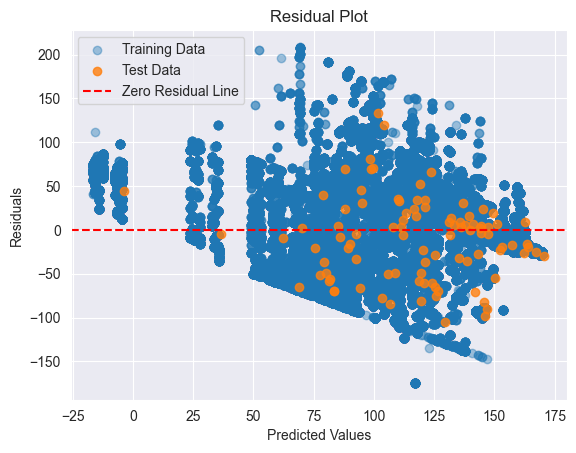

In [124]:
# Reshape y_test_pred
y_test_pred = y_test_pred.reshape(-1, 1)

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Plot residuals
plt.scatter(y_train_pred, train_residuals, label='Training Data', alpha=0.4)
plt.scatter(y_test_pred, test_residuals, label='Test Data', alpha=0.8)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

### Actual vs Predicted Values

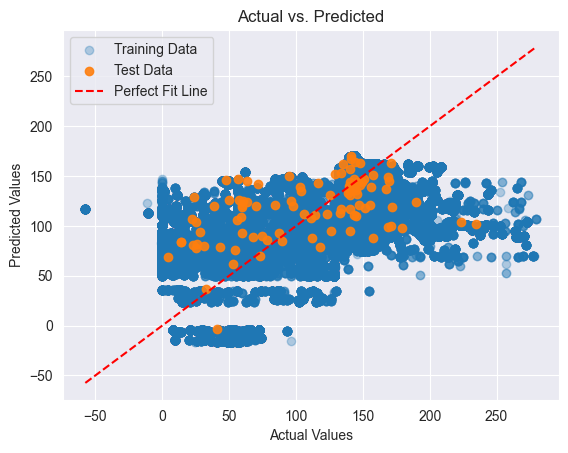

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Convert y_train and y_test to NumPy arrays
y_train_np = y_train.values
y_test_np = y_test.values

plt.scatter(y_train, y_train_pred, label='Training Data', alpha=0.3)
plt.scatter(y_test, y_test_pred, label='Test Data', alpha=0.9)
plt.plot([np.min([y_train_np.min(), y_test_np.min()]), np.max([y_train_np.max(), y_test_np.max()])], 
         [np.min([y_train_np.min(), y_test_np.min()]), np.max([y_train_np.max(), y_test_np.max()])], 
         'r--', label='Perfect Fit Line')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Polynomial Regression

In [126]:
from sklearn.pipeline import Pipeline

degree = 3

# Creating a pipeline for polynomial regression
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('linear_regression', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error (MSE) on the training data
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("---------------")

# Calculate R^2 score on the training data
train_r2_score = metrics.r2_score(y_train, y_train_pred)
test_r2_score = metrics.r2_score(y_test, y_test_pred)
print("Training R^2 score:", train_r2_score)
print("Testing R^2 score:", test_r2_score)

#storing results and appending to a dataframe
model_results = pd.DataFrame([['Polynomial Regression', test_mae, test_mse, test_r2_score]],
               columns = ['Model', 'MAE', 'MSE', 'R2 Score'])

results = results._append(model_results, ignore_index=True)

Train MSE: 949.8497664712079
Test MSE: 1371.5379000643027
---------------
Training R^2 score: 0.6951922199584417
Testing R^2 score: 0.4944492859371207


In [127]:
results

,Model,MAE,MSE,R2 Score
0,Multiple Linear Regression,37.145634,2261.00536,0.166590
1,Polynomial Regression,26.985482,1371.53790,0.494449


## Results of Polynomial Regression on Training Data
#### degree 1: MSE = 2107, R2 score = 0.32
#### degree 2: MSE = 1333, R2 score = 0.57
#### degree 3: MSE = 949, R2 score = 0.69
#### degree 4: MSE = 762, R2 score = 0.75

## Results of Polynomial Regression on Test Data
#### degree 1: MSE = 2261, R2 score = 0.16
#### degree 2: MSE = 1997, R2 score = 0.26
#### degree 3: MSE = 1371, R2 score = 0.49
#### degree 4: MSE = 1522, R2 score = 0.43

We can see here that on increasing the degree to 4, the R2 score is getting decreased and error is getting increased as well. 

### Best Results: Polynomial Regression with Degree 3
#### Train R2- 0.69, Test R2- 0.49

*It is overfitting as we can clearly see that test accuracy is significantly lesser than training accuracy.*

### Plotting Residuals

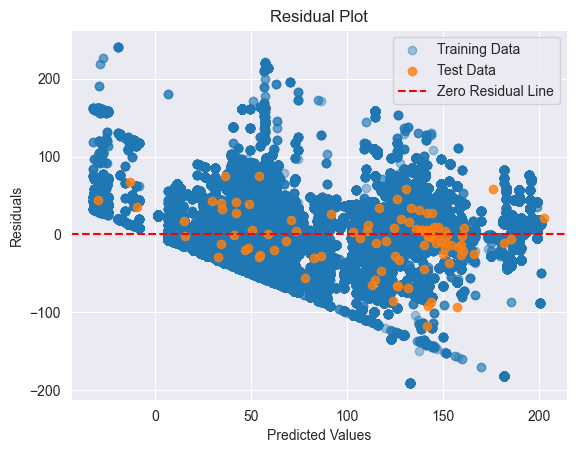

In [129]:
# Reshape y_test_pred
y_test_pred = y_test_pred.reshape(-1, 1)

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Plot residuals
plt.scatter(y_train_pred, train_residuals, label='Training Data', alpha=0.4)
plt.scatter(y_test_pred, test_residuals, label='Test Data', alpha=0.8)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

<Axes: ylabel='Count'>

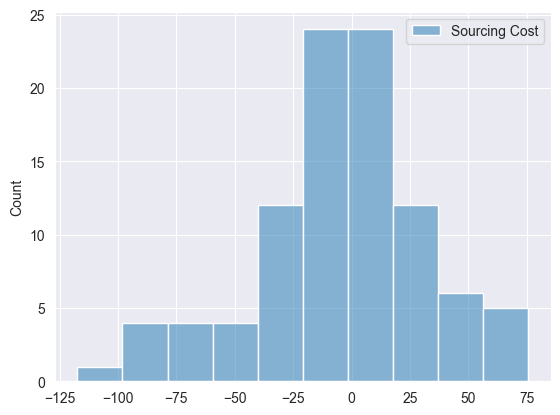

In [130]:
# Histogram of Residuals
sns.histplot(test_residuals,bins=10)

**We can observe that the distribution of residuals follows a normal curve.**

### Actual vs Predicted Values

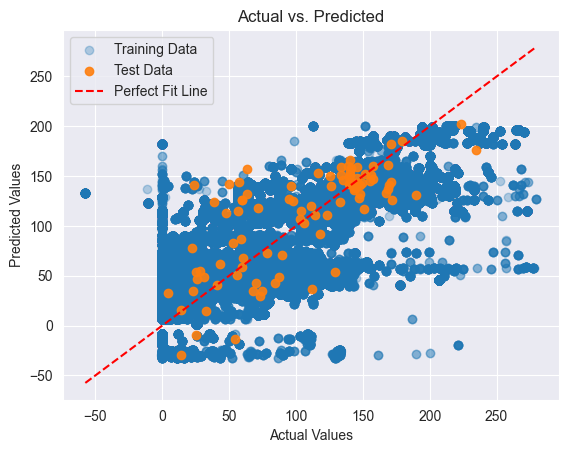

In [131]:
# Convert y_train and y_test to NumPy arrays
y_train_np = y_train.values
y_test_np = y_test.values

plt.scatter(y_train, y_train_pred, label='Training Data', alpha=0.3)
plt.scatter(y_test, y_test_pred, label='Test Data', alpha=0.9)
plt.plot([np.min([y_train_np.min(), y_test_np.min()]), np.max([y_train_np.max(), y_test_np.max()])], 
         [np.min([y_train_np.min(), y_test_np.min()]), np.max([y_train_np.max(), y_test_np.max()])], 
         'r--', label='Perfect Fit Line')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Applying Regularization
## Ridge (L1)

In [132]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
degree = 3
alpha = 0.4  # Regularization strength

pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('ridge_regression', Ridge(alpha=alpha))
])

pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error (MSE) on the training data
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("---------------")

train_r2_score = r2_score(y_train, y_train_pred)
test_r2_score = r2_score(y_test, y_test_pred)
print("Training R^2 score:", train_r2_score)
print("Testing R^2 score:", test_r2_score)

#storing results in results dataframe
model_results = pd.DataFrame([['Ridge Regularization', test_mae, test_mse, test_r2_score]],
               columns = ['Model', 'MAE', 'MSE', 'R2 Score'])

results = results._append(model_results, ignore_index = True)

D:\coding\Pycharm\AP Moller Project\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.65833e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train MSE: 957.0431083463319
Test MSE: 1298.874048579929
---------------
Training R^2 score: 0.6928838690534536
Testing R^2 score: 0.5212332792943308


### With Regularization:
* Alpha: 0.1, Train R2 = 0.69, Test R2 = 0.52 (slight increase in test score)
* Alpha: 0.2, 0.3, 0.4... almost same results
* It is observed that on tweaking the value of alpha, the results are similar.


In [133]:
results

,Model,MAE,MSE,R2 Score
0,Multiple Linear Regression,37.145634,2261.005360,0.166590
1,Polynomial Regression,26.985482,1371.537900,0.494449
2,Ridge Regularization,25.953128,1298.874049,0.521233


### Plotting Residuals

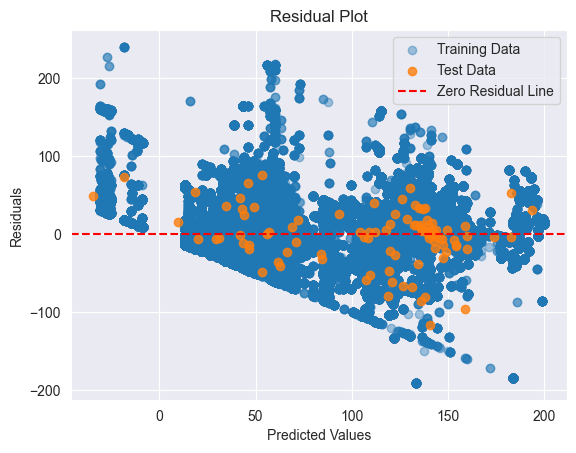

In [134]:
# Reshape y_test_pred
y_test_pred = y_test_pred.reshape(-1, 1)

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Plot residuals
plt.scatter(y_train_pred, train_residuals, label='Training Data', alpha=0.4)
plt.scatter(y_test_pred, test_residuals, label='Test Data', alpha=0.8)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

### Actual vs Predicted values

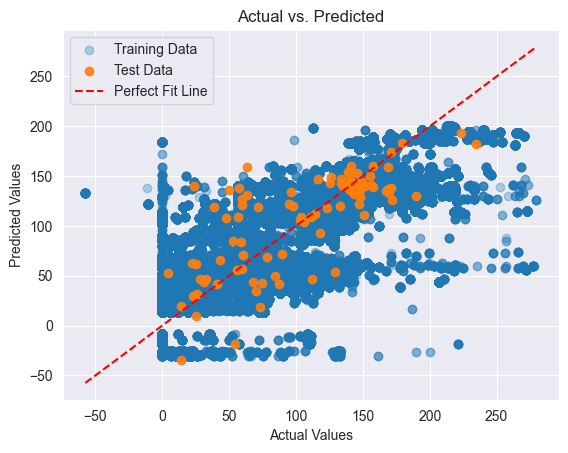

In [135]:
# Convert y_train and y_test to NumPy arrays
y_train_np = y_train.values
y_test_np = y_test.values

plt.scatter(y_train, y_train_pred, label='Training Data', alpha=0.3)
plt.scatter(y_test, y_test_pred, label='Test Data', alpha=0.9)
plt.plot([np.min([y_train_np.min(), y_test_np.min()]), np.max([y_train_np.max(), y_test_np.max()])], 
         [np.min([y_train_np.min(), y_test_np.min()]), np.max([y_train_np.max(), y_test_np.max()])], 
         'r--', label='Perfect Fit Line')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Lasso Regularization

In [136]:
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

degree = 3
alpha = 0.1  # Regularization strength

pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('lasso_regression', Lasso(alpha=alpha))
])

pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error (MSE) on the training data
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("---------------")

train_r2_score = metrics.r2_score(y_train, y_train_pred)
test_r2_score = metrics.r2_score(y_test, y_test_pred)
print("Training R^2 score:", train_r2_score)
print("Testing R^2 score:", test_r2_score)

model_results = pd.DataFrame([['Lasso Regularization', test_mae, test_mse, test_r2_score]],
               columns = ['Model', 'MAE', 'MSE', 'R2 Score'])

results = results._append(model_results, ignore_index = True)


D:\coding\Pycharm\AP Moller Project\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.022e+08, tolerance: 1.706e+05
  model = cd_fast.enet_coordinate_descent(


Train MSE: 1067.6617645657393
Test MSE: 1566.9226921439138
---------------
Training R^2 score: 0.657386226980348
Testing R^2 score: 0.4224301888722539


#### for alpha: 0.1, Train r2 = 65, Test r2 = 42


#### For both Lasso and ElasticNet Regularization, they fails to outperform ridge.

# KNN Regression

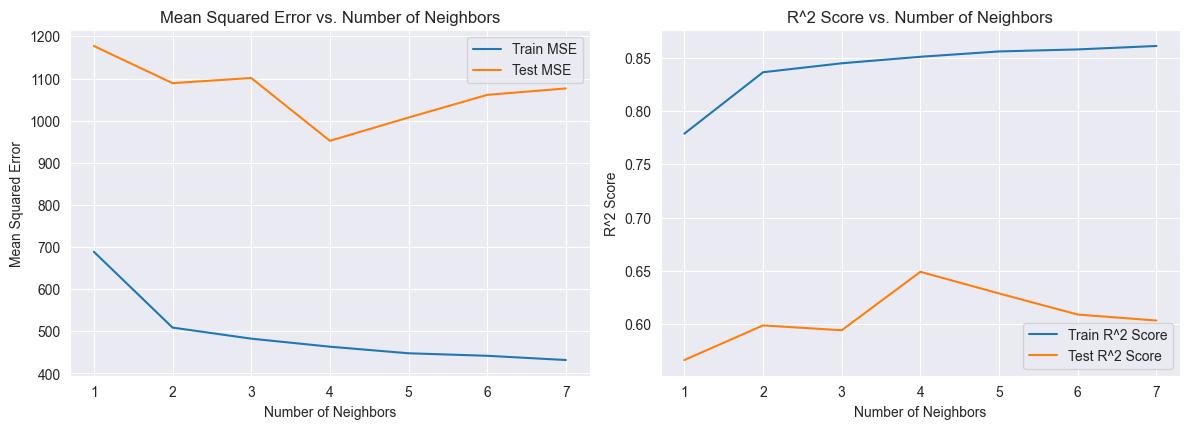

In [138]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

#range of values for n_neighbors
n_neighbors_range = range(1, 8)

# Lists to store evaluation metrics for each value of n_neighbors
train_mse_scores = []
test_mse_scores = []
train_r2_scores = []
test_r2_scores = []
test_mae_scores = []

# Loop over different values of n_neighbors
for n_neighbors in n_neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    y_test_pred = knn.predict(X_test)
    y_train_pred = knn.predict(X_train)
    
    train_mse = metrics.mean_squared_error(y_train, y_train_pred)
    test_mse = metrics.mean_squared_error(y_test, y_test_pred)
    test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
    
    train_r2_score = metrics.r2_score(y_train, y_train_pred)
    test_r2_score = metrics.r2_score(y_test, y_test_pred)
    
    # Append the evaluation metrics to the respective lists
    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)
    train_r2_scores.append(train_r2_score)
    test_r2_scores.append(test_r2_score)
    test_mae_scores.append(test_mae)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(n_neighbors_range, train_mse_scores, label='Train MSE')
plt.plot(n_neighbors_range, test_mse_scores, label='Test MSE')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Number of Neighbors')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(n_neighbors_range, train_r2_scores, label='Train R^2 Score')
plt.plot(n_neighbors_range, test_r2_scores, label='Test R^2 Score')
plt.xlabel('Number of Neighbors')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs. Number of Neighbors')
plt.legend()

plt.tight_layout()
plt.show()

#### From the above plot, we can see that for n-neighbors = 4 in KNN, The test r2 score is highest and the test mse is the lowest.

In [139]:
print(f"Test MSE Score: {test_mse_scores[3]}")
print(f"Test MAE Score: {test_mae_scores[3]}")
print(f"Test RMSE Score: {np.sqrt(test_mse_scores[3])}")
print(f"Test R2 Score: {test_r2_scores[3]}")

model_results = pd.DataFrame([['KNN Regressor', test_mae_scores[3], test_mse_scores[3], test_r2_scores[3]]],
               columns = ['Model', 'MAE', 'MSE', 'R2 Score'])

results = results._append(model_results, ignore_index = True)

Test MSE Score: 952.2060205729167
Test MAE Score: 16.35229166666667
Test RMSE Score: 30.857835643040758
Test R2 Score: 0.6490155805296802


In [140]:
results

,Model,MAE,MSE,R2 Score
0,Multiple Linear Regression,37.145634,2261.005360,0.166590
1,Polynomial Regression,26.985482,1371.537900,0.494449
2,Ridge Regularization,25.953128,1298.874049,0.521233
3,Lasso Regularization,26.799934,1566.922692,0.422430
4,KNN Regressor,16.352292,952.206021,0.649016


# Decision Tree

In [141]:
## Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state= 42)
dt_regressor.fit(X_train, y_train)

y_test_pred = dt_regressor.predict(X_test)
y_train_pred = dt_regressor.predict(X_train)

test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_r2 = metrics.r2_score(y_test, y_test_pred)

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_r2 = metrics.r2_score(y_train, y_train_pred)

print(f"Test MSE Score: {test_mse}")
print(f"Test MAE Score: {test_mae}")
print(f"Test RMSE Score: {np.sqrt(test_mse)}")
print(f"Test R2 Score: {test_r2}")
print("------------------------")
print(f"Train MSE Score: {train_mse}")
print(f"Train MAE Score: {train_mae}")
print(f"Train RMSE Score: {np.sqrt(train_mse)}")
print(f"Train R2 Score: {train_r2}")


Test MSE Score: 1066.1590753633334
Test MAE Score: 16.555190555603676
Test RMSE Score: 32.652091439344794
Test R2 Score: 0.6070123313185277
------------------------
Train MSE Score: 364.8600677027353
Train MAE Score: 9.078951157794021
Train RMSE Score: 19.101310627879315
Train R2 Score: 0.8829160239987757


In [142]:
model_results = pd.DataFrame([['Decision Tree', test_mae, test_mse, test_r2]],
               columns = ['Model', 'MAE', 'MSE', 'R2 Score'])

results = results._append(model_results, ignore_index = True)

In [143]:
results

,Model,MAE,MSE,R2 Score
0,Multiple Linear Regression,37.145634,2261.005360,0.166590
1,Polynomial Regression,26.985482,1371.537900,0.494449
2,Ridge Regularization,25.953128,1298.874049,0.521233
3,Lasso Regularization,26.799934,1566.922692,0.422430
4,KNN Regressor,16.352292,952.206021,0.649016
5,Decision Tree,16.555191,1066.159075,0.607012


### Plotting Residuals

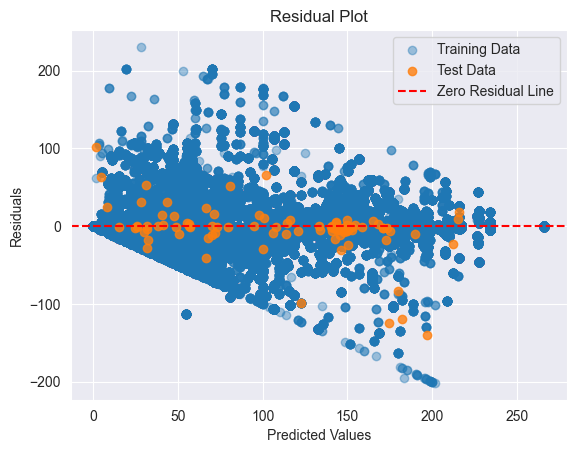

In [144]:
# Reshape y_test_pred
y_test_pred = y_test_pred.reshape(-1, 1)

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Plot residuals
plt.scatter(y_train_pred, train_residuals, label='Training Data', alpha=0.4)
plt.scatter(y_test_pred, test_residuals, label='Test Data', alpha=0.8)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

### Plotting Actual vs Predicted Values

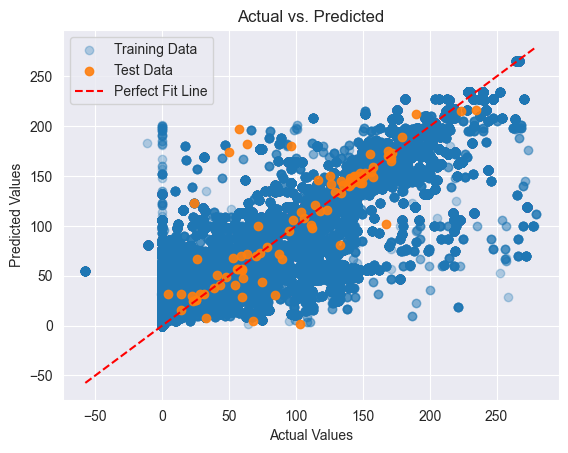

In [145]:
# Convert y_train and y_test to NumPy arrays
y_train_np = y_train.values
y_test_np = y_test.values

plt.scatter(y_train, y_train_pred, label='Training Data', alpha=0.3)
plt.scatter(y_test, y_test_pred, label='Test Data', alpha=0.9)
plt.plot([np.min([y_train_np.min(), y_test_np.min()]), np.max([y_train_np.max(), y_test_np.max()])], 
         [np.min([y_train_np.min(), y_test_np.min()]), np.max([y_train_np.max(), y_test_np.max()])], 
         'r--', label='Perfect Fit Line')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Random Forest

In [146]:
# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=80, random_state=42, )
rf_regressor.fit(X_train, y_train)

y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_r2 = metrics.r2_score(y_test, y_test_pred)

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_r2 = metrics.r2_score(y_train, y_train_pred)

print(f"Test MSE Score: {test_mse}")
print(f"Test MAE Score: {test_mae}")
print(f"Test RMSE Score: {np.sqrt(test_mse)}")
print(f"Test R2 Score: {test_r2}")
print("------------------------")
print(f"Train MSE Score: {train_mse}")
print(f"Train MAE Score: {train_mae}")
print(f"Train RMSE Score: {np.sqrt(train_mse)}")
print(f"Train R2 Score: {train_r2}")

Test MSE Score: 1059.0441062102277
Test MAE Score: 16.524354263777955
Test RMSE Score: 32.54295785896279
Test R2 Score: 0.6096349185147834
------------------------
Train MSE Score: 364.87613404015667
Train MAE Score: 9.080286401171271
Train RMSE Score: 19.101731179140717
Train R2 Score: 0.8829108682943521


In [147]:
model_results = pd.DataFrame([['Random Forest', test_mae, test_mse, test_r2]],
               columns = ['Model', 'MAE', 'MSE', 'R2 Score'])

results = results._append(model_results, ignore_index = True)

### Plotting Residuals

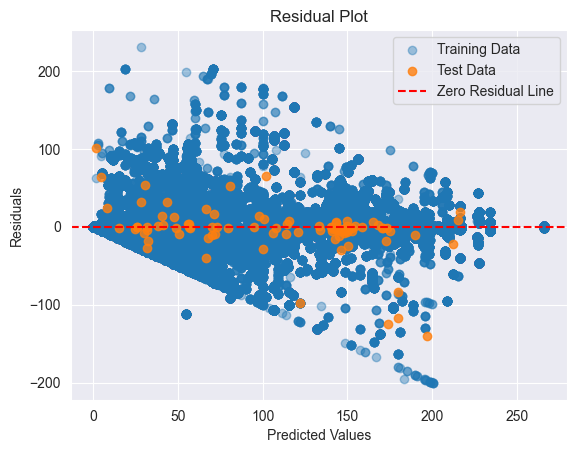

In [148]:
# Reshape y_test_pred
y_test_pred = y_test_pred.reshape(-1, 1)

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Plot residuals
plt.scatter(y_train_pred, train_residuals, label='Training Data', alpha=0.4)
plt.scatter(y_test_pred, test_residuals, label='Test Data', alpha=0.8)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

### Plotting Actual vs Predicted values

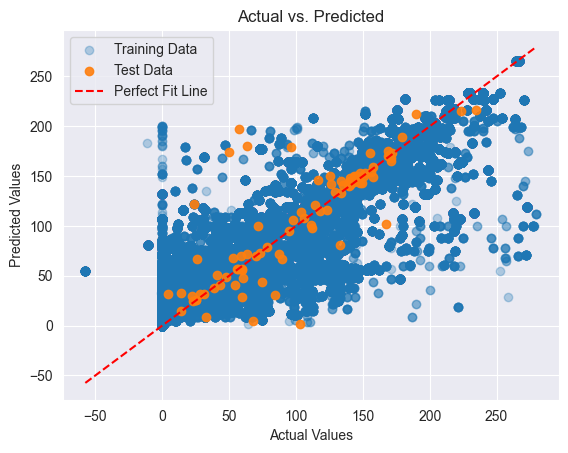

In [149]:
# Convert y_train and y_test to NumPy arrays
y_train_np = y_train.values
y_test_np = y_test.values

plt.scatter(y_train, y_train_pred, label='Training Data', alpha=0.3)
plt.scatter(y_test, y_test_pred, label='Test Data', alpha=0.9)
plt.plot([np.min([y_train_np.min(), y_test_np.min()]), np.max([y_train_np.max(), y_test_np.max()])], 
         [np.min([y_train_np.min(), y_test_np.min()]), np.max([y_train_np.max(), y_test_np.max()])], 
         'r--', label='Perfect Fit Line')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# XG Boost Regressor

In [151]:
#Xg Boosting
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(n_estimators=77)
xgb_regressor.fit(X_train, y_train)

y_test_pred = xgb_regressor.predict(X_test)
y_train_pred = xgb_regressor.predict(X_train)

test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_r2 = metrics.r2_score(y_test, y_test_pred)

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_r2 = metrics.r2_score(y_train, y_train_pred)

print(f"Test MSE Score: {test_mse}")
print(f"Test MAE Score: {test_mae}")
print(f"Test RMSE Score: {np.sqrt(test_mse)}")
print(f"Test R2 Score: {test_r2}")
print("------------------------")
print(f"Train MSE Score: {train_mse}")
print(f"Train MAE Score: {train_mae}")
print(f"Train RMSE Score: {np.sqrt(train_mse)}")
print(f"Train R2 Score: {train_r2}")

Test MSE Score: 934.5369663232499
Test MAE Score: 15.61556918422381
Test RMSE Score: 30.57019735499347
Test R2 Score: 0.6555284176830072
------------------------
Train MSE Score: 369.7973633216343
Train MAE Score: 9.372787204652333
Train RMSE Score: 19.230116050654356
Train R2 Score: 0.8813316406887745


In [152]:
model_results = pd.DataFrame([['XG Boost', test_mae, test_mse, test_r2]],
               columns = ['Model', 'MAE', 'MSE', 'R2 Score'])

results = results._append(model_results, ignore_index = True)

### Plotting Residuals

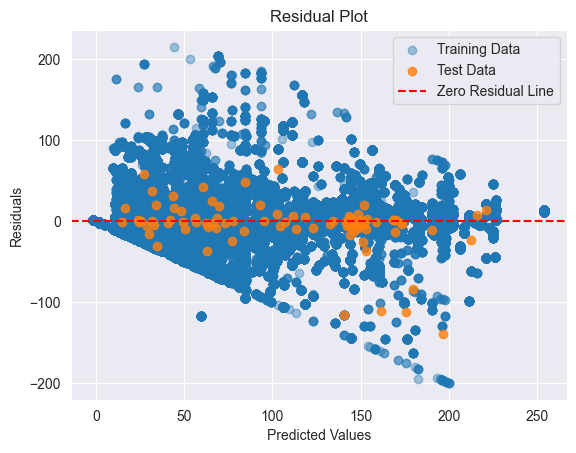

In [154]:
# Reshape y_test_pred
y_test_pred = y_test_pred.reshape(-1, 1)

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Plot residuals
plt.scatter(y_train_pred, train_residuals, label='Training Data', alpha=0.4)
plt.scatter(y_test_pred, test_residuals, label='Test Data', alpha=0.8)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

### Actual vs Predicted Values

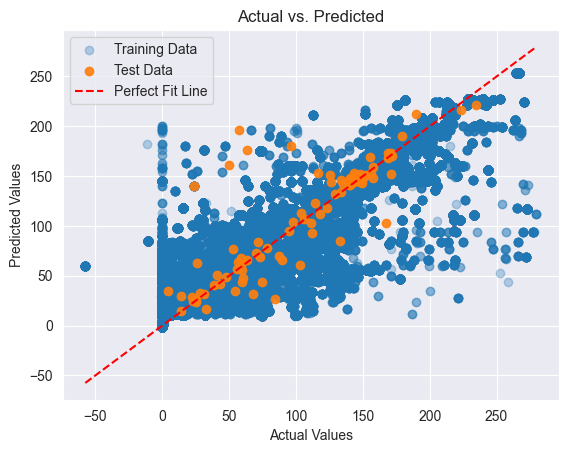

In [155]:
# Convert y_train and y_test to NumPy arrays
y_train_np = y_train.values
y_test_np = y_test.values

plt.scatter(y_train, y_train_pred, label='Training Data', alpha=0.3)
plt.scatter(y_test, y_test_pred, label='Test Data', alpha=0.9)
plt.plot([np.min([y_train_np.min(), y_test_np.min()]), np.max([y_train_np.max(), y_test_np.max()])], 
         [np.min([y_train_np.min(), y_test_np.min()]), np.max([y_train_np.max(), y_test_np.max()])], 
         'r--', label='Perfect Fit Line')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Final Results

In [157]:
results['RMSE'] = results['MSE'].apply(np.sqrt)

In [158]:
results

,Model,MAE,MSE,R2 Score,RMSE
0,Multiple Linear Regression,37.145634,2261.005360,0.166590,47.550030
1,Polynomial Regression,26.985482,1371.537900,0.494449,37.034280
2,Ridge Regularization,25.953128,1298.874049,0.521233,36.039895
3,Lasso Regularization,26.799934,1566.922692,0.422430,39.584374
4,KNN Regressor,16.352292,952.206021,0.649016,30.857836
5,Decision Tree,16.555191,1066.159075,0.607012,32.652091
6,Random Forest,16.524354,1059.044106,0.609635,32.542958
7,XG Boost,15.615569,934.536966,0.655528,30.570197


# Visualizing Results

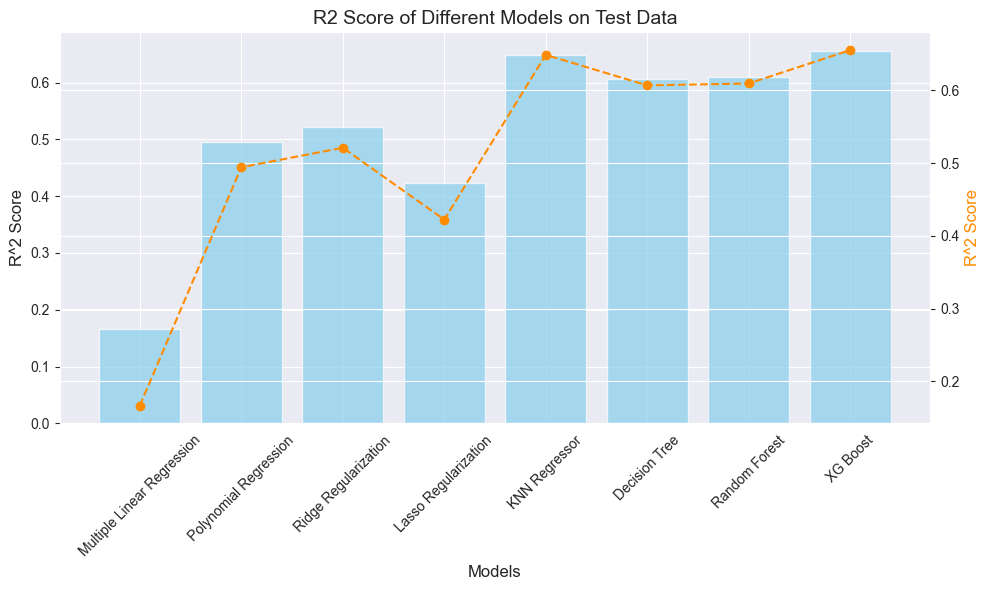

In [167]:
models = results['Model']
r2_score = results['R2 Score']

fig, ax1 = plt.subplots(figsize=(10, 6))

#plotting bar chart
ax1.bar(models, r2_score, color='skyblue', alpha=0.7)
ax1.set_xlabel('Models', fontsize=12)
ax1.set_ylabel('R^2 Score', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('R2 Score of Different Models on Test Data', fontsize=14)

# Creating a twin axis for the line plot
ax2 = ax1.twinx()

# Plot the line chart
ax2.plot(models, r2_score, color='darkorange', marker='o', linestyle='--')
ax2.set_ylabel('R^2 Score', fontsize=12, color='darkorange') 

fig.tight_layout()

plt.show()

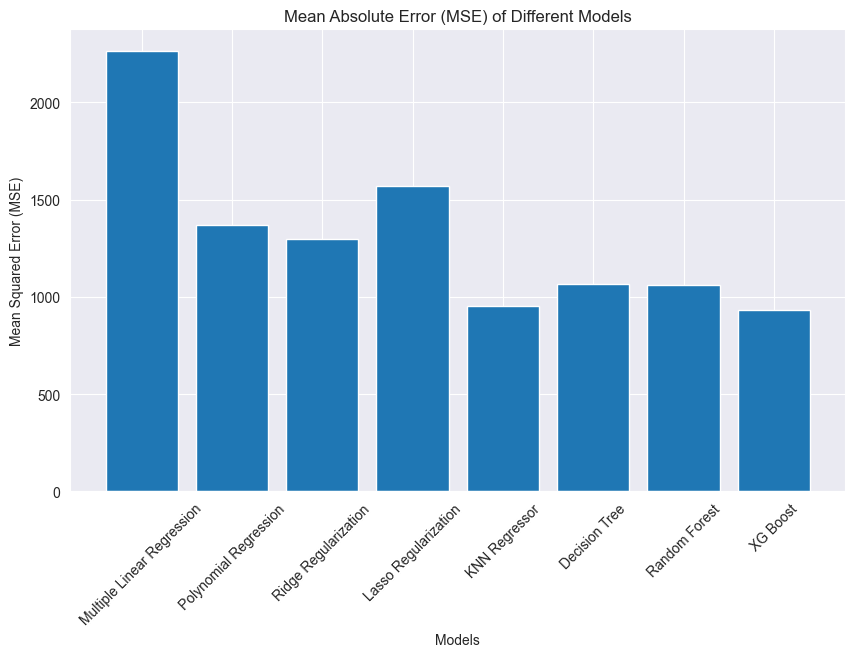

In [185]:
# MSE of different models barchart
models = results['Model']
mse = results['MSE']

plt.figure(figsize=(10, 6))
plt.bar(models, mse)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.title('Mean Absolute Error (MSE) of Different Models')
plt.show()

### Comparison of MAE and RMSE Errors of Different Models

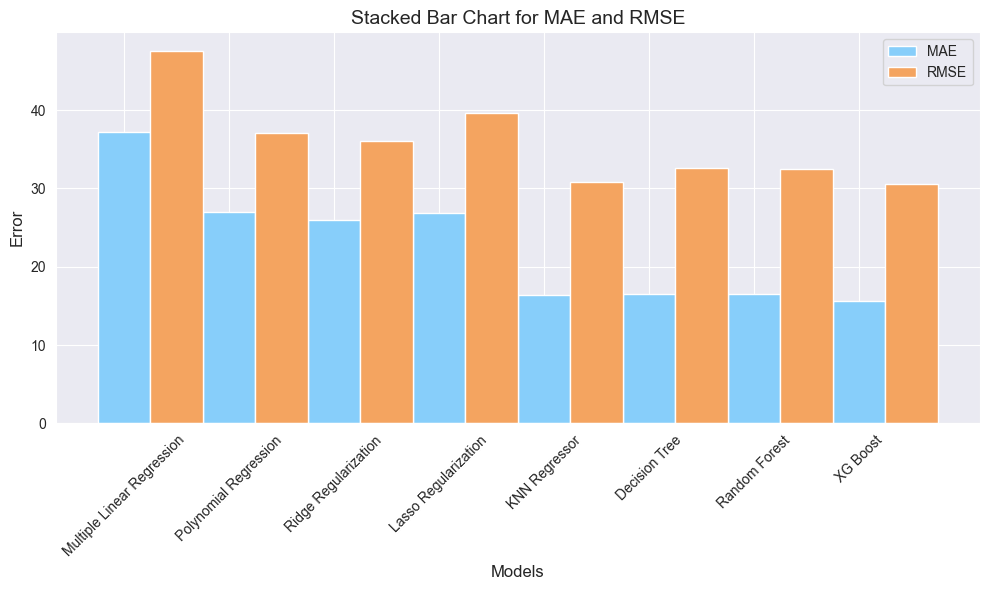

In [183]:
models = results['Model']
mse = results['MSE']
mae = results['MAE']
rmse = results['RMSE']

fig, ax = plt.subplots(figsize=(10, 6))

# Set the bar width
bar_width = 0.5

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

ax.bar(r2, mae, color='lightskyblue', width=bar_width, edgecolor='white', label='MAE')
ax.bar(r3, rmse, color='sandybrown', width=bar_width, edgecolor='white', label='RMSE')

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Error', fontsize=12)
ax.set_title('Stacked Bar Chart for MAE and RMSE', fontsize=14)
ax.set_xticks([r + bar_width for r in range(len(models))], models)
ax.tick_params(axis='x', rotation=45)
ax.legend(loc='upper right')

plt.tight_layout()

plt.show()